# online food order prediction 05/07/25

In [2]:
# importing required lib :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import random

In [3]:
df= pd.read_csv('onlinefoods.csv')

In [4]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [5]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [6]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [7]:
df.shape

(388, 13)

In [8]:
df.isnull().sum() #check empty values

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

<Axes: title={'center': 'online food order prediction based of customer age:'}, xlabel='Age', ylabel='count'>

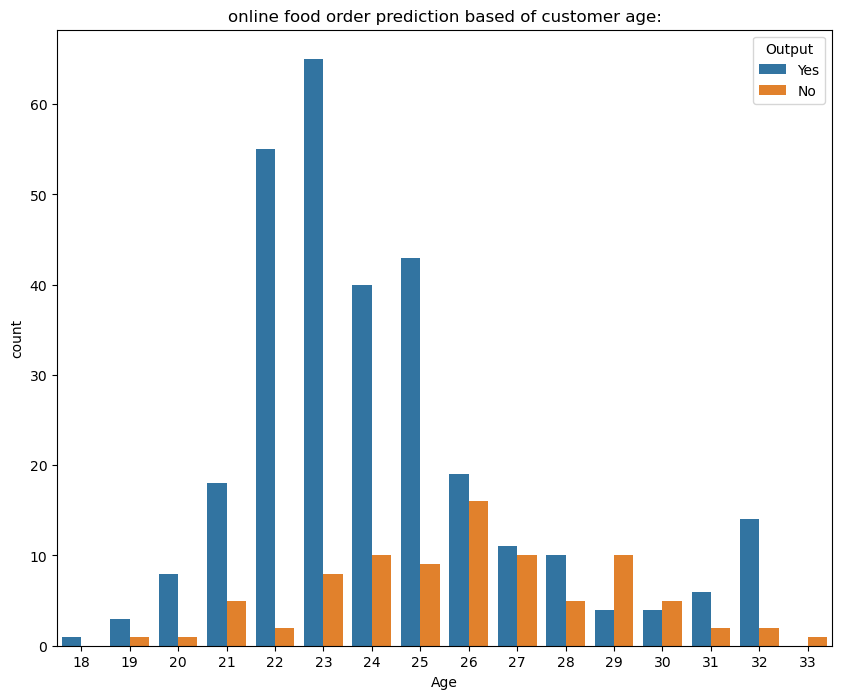

In [9]:
plt.figure(figsize=(10,8))
plt.title("online food order prediction based of customer age:")
sns.countplot(x='Age',data=df,hue='Output')

<Axes: title={'center': 'online food order prediction based size of family'}, xlabel='Family size', ylabel='count'>

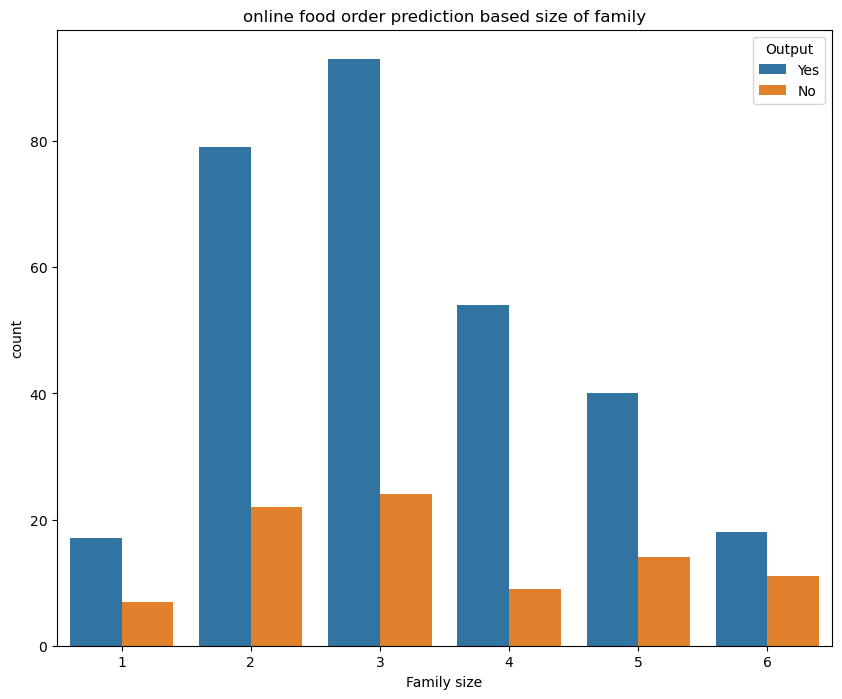

In [10]:
plt.figure(figsize=(10,8))
plt.title('online food order prediction based size of family')
sns.countplot(x='Family size',data=df,hue='Output')

<Axes: title={'center': 'online food order prediction based on customer educational Qualification'}, xlabel='Educational Qualifications', ylabel='count'>

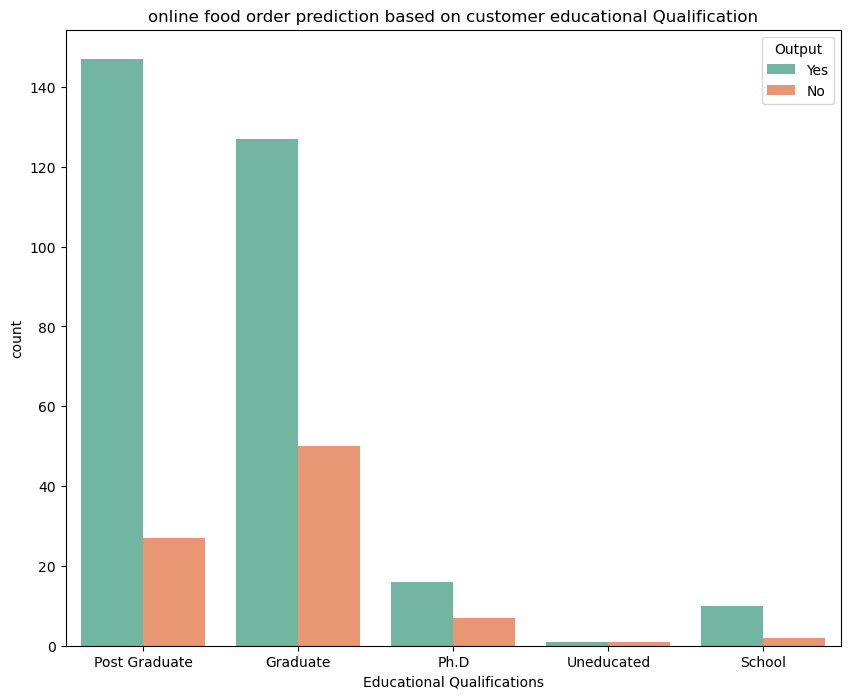

In [11]:
plt.figure(figsize=(10,8)) # based on qualification
plt.title('online food order prediction based on customer educational Qualification')
sns.countplot(x='Educational Qualifications',data=df,hue='Output',palette='Set2')


166
222


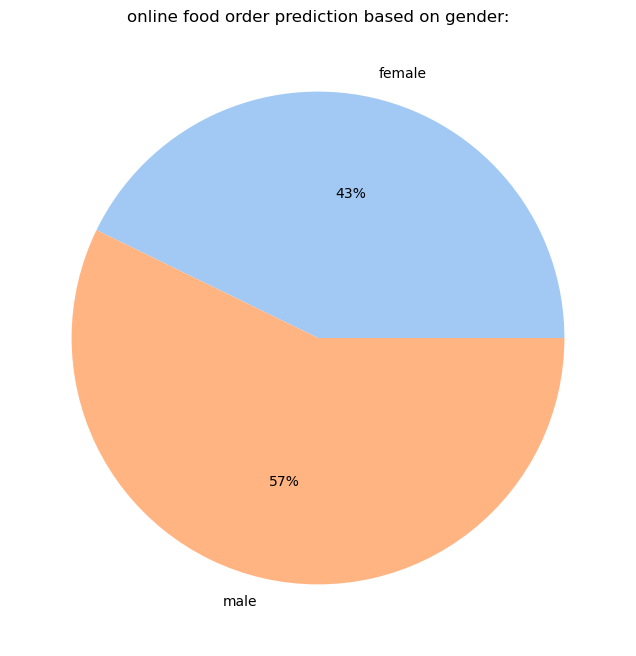

In [12]:
female=len(df[df['Gender']=='Female'])
male=len(df[df['Gender']=='Male'])
print(female)
print(male)
gender=[female,male]
labels=['female','male']
plt.figure(figsize=(10,8))
colors=sns.color_palette('pastel')
plt.title("online food order prediction based on gender:")
plt.pie(gender,labels=labels,colors=colors,autopct='%.0f%%')
plt.show()

<Axes: title={'center': 'occupation'}, xlabel='Occupation', ylabel='count'>

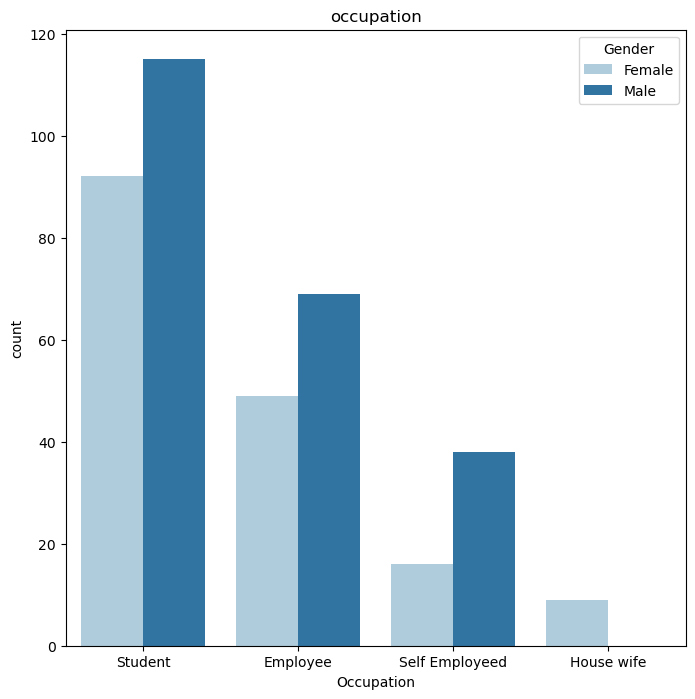

In [13]:
# food order prediction based on occupations:
plt.figure(figsize=(8,8))
plt.title("occupation")
sns.countplot(x='Occupation',data=df,hue='Gender',palette='Paired')

<Axes: title={'center': 'online food order prediction based on Occupation:'}, xlabel='Occupation', ylabel='count'>

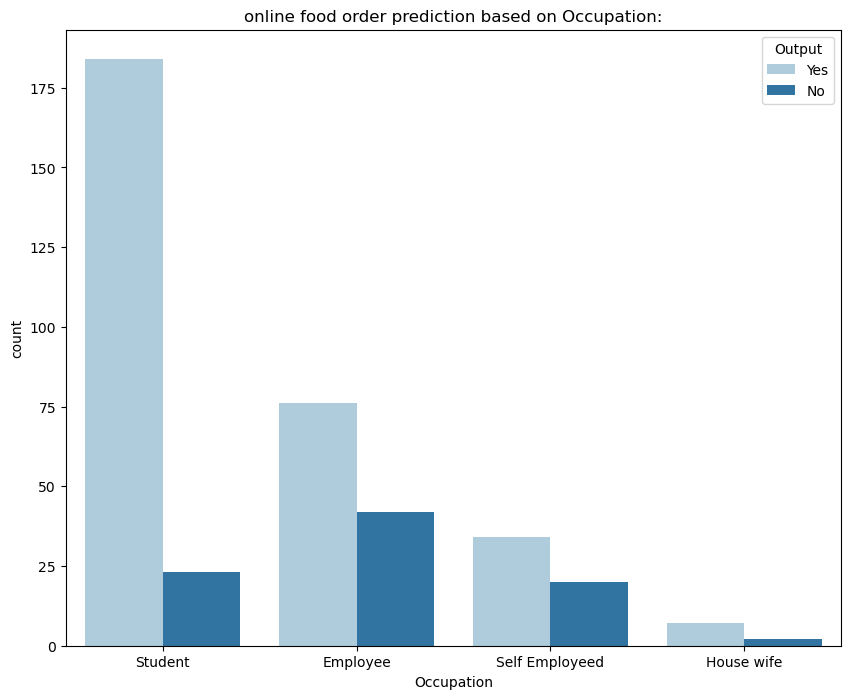

In [14]:
plt.figure(figsize=(10,8))
plt.title("online food order prediction based on Occupation:")
sns.countplot(x='Occupation',data=df,hue='Output',palette='Paired')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib
# Encode categorical columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Educational Qualifications'] = le.fit_transform(df['Educational Qualifications'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Output'] = le.fit_transform(df['Output'])

# Select features and label
X = df[['Age', 'Gender', 'Family size', 'Educational Qualifications', 'Occupation']]
y = df['Output']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model as a file
joblib.dump(model, 'food_order_model.pkl')
print("Model saved successfully as food_order_model.pkl")

Model saved successfully as food_order_model.pkl
